<a href="https://colab.research.google.com/github/machave11/Stock-Price-Prediction/blob/main/Stock_Price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset= pd.read_excel('/content/drive/MyDrive/1613615-Stock_Price_data_set.xlsx')

In [ ]:
dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100.0
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800.0
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500.0
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700.0
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900.0


In [ ]:
dataset.shape

(1009, 7)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1009 non-null   datetime64[ns]
 1   Open       1009 non-null   float64       
 2   High       1009 non-null   float64       
 3   Low        1009 non-null   float64       
 4   Close      1009 non-null   float64       
 5   Adj Close  1009 non-null   float64       
 6   Volume     1009 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 55.3 KB


In [ ]:
dataset.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07


In [ ]:
dataset.drop('Adj Close', axis=1, inplace=True)

In [ ]:
dataset.head()

,Date,Open,High,Low,Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,11896100.0
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,12595800.0
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,8981500.0
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,9306700.0
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,16906900.0


In [ ]:
dataset.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [ ]:
dataset.isna().any()

Date      False
Open      False
High      False
Low       False
Close     False
Volume    False
dtype: bool

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1009 non-null   datetime64[ns]
 1   Open    1009 non-null   float64       
 2   High    1009 non-null   float64       
 3   Low     1009 non-null   float64       
 4   Close   1009 non-null   float64       
 5   Volume  1009 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 47.4 KB


In [ ]:
dataset.describe()

,Open,High,Low,Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,5.890430e+07


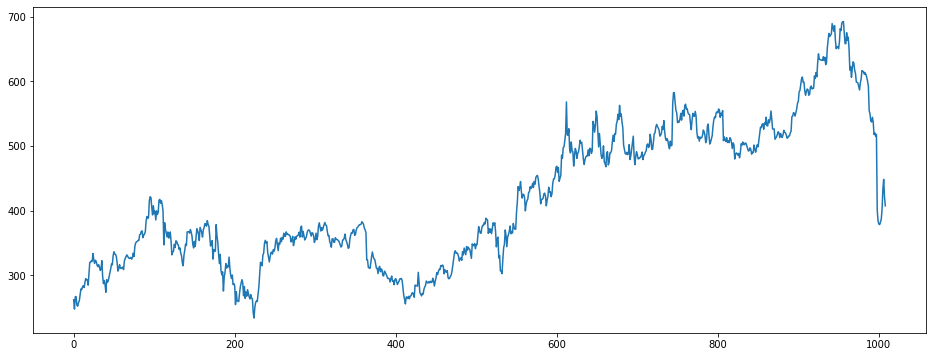

In [ ]:
dataset['Open'].plot(figsize=(16,6))

In [ ]:
X = dataset[['Open', 'Low', 'High', 'Volume']]
y = dataset['Close']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [ ]:
X_train.shape

(756, 4)

In [ ]:
X_test.shape

(253, 4)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [ ]:
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
print(regressor.coef_)

[-5.98637669e-01  8.57948723e-01  7.42752459e-01  9.68159262e-08]


In [ ]:
print(regressor.intercept_)

-0.7077595577302418


In [ ]:
predicted = regressor.predict(X_test)

In [ ]:
print(X_test)

            Open         Low        High      Volume
801   557.000000  550.299988  559.750000   2720300.0
311   378.000000  374.510010  383.500000   5398200.0
85    368.540009  357.799988  368.700012   8278000.0
435   278.049988  277.350006  285.750000   6248400.0
204   260.549988  253.800003  266.250000  12498600.0
...          ...         ...         ...         ...
583   418.829987  415.980011  426.720001   3743700.0
200   283.790009  269.149994  285.089996  12993800.0
767   525.000000  518.280029  548.539978   4136500.0
1000  379.140015  365.130005  387.709991  15145800.0
385   298.859985  296.269989  303.549988   6905800.0

[253 rows x 4 columns]


In [ ]:
predicted.shape

(253,)

In [ ]:
dataset= pd.DataFrame(y_test, predicted)

In [ ]:
dataset= pd.DataFrame({'Actual Price': y_test, 'Predicted Price':predicted})

In [ ]:
print(dataset)

      Actual Price  Predicted Price
801     553.729980       553.999288
311     379.059998       379.685786
85      361.399994       360.298634
435     281.859985       283.639587
204     261.429993       260.032497
...            ...              ...
583     425.920013       422.764132
200     270.600006       273.331047
767     546.150024       537.495050
1000    366.420013       375.026471
385     302.799988       300.698946

[253 rows x 2 columns]


In [ ]:
dataset.head(25)

,Actual Price,Predicted Price
801,553.729980,553.999288
311,379.059998,379.685786
85,361.399994,360.298634
435,281.859985,283.639587
204,261.429993,260.032497
590,434.480011,434.730957
1,265.720001,260.518692
780,518.020020,518.570772
457,315.929993,315.400869
299,348.869995,345.455041


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
regressor.score(X_test, y_test)

0.9982601041694668

In [ ]:
import math

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,predicted))

Mean Absolute Error: 3.12408812736622


In [ ]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predicted))

Mean Squared Error: 19.163612341332843


In [ ]:
print('Root Mean Squared Error:', metrics.mean_squared_error(y_test, predicted))

Root Mean Squared Error: 19.163612341332843


In [ ]:
graph = dataset.head(20)

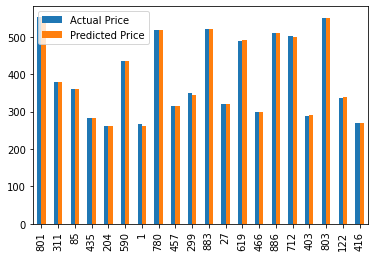

In [ ]:
graph.plot(kind='bar')